<a href="https://colab.research.google.com/github/polevev/kaggle/blob/main/Stars_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train_star.csv')
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
118,8.97,8.60,1.19,0.463,F0V,18.642494,Giant
17105,9.39,6.73,0.88,0.563,G2V,18.530075,Giant
6160,9.19,12.17,4.81,0.499,F0/F2IV:,19.616451,Giant
14959,9.47,6.38,1.51,0.512,F5V,18.494104,Giant
6015,8.24,4.15,1.06,0.016,B9.5V,16.330240,Giant


In [ ]:
df.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,20732.000000,20732.000000,20732.000000,20732.000000,20732.000000
mean,8.045100,8.774717,1.157515,0.584712,16.671187
std,1.299999,15.186434,0.888745,0.457422,2.407249
min,-0.010000,-27.840000,0.420000,-0.400000,-0.350000
25%,7.370000,3.020000,0.820000,0.227000,15.284584
50%,8.280000,5.680000,1.010000,0.526000,16.706049
75%,8.930000,10.170000,1.280000,0.923000,18.282476
max,12.560000,772.330000,40.630000,3.315000,30.449015


Обработка поля e_Plx и Plx


In [ ]:
df['TargetClass'] = df['TargetClass'].apply(lambda x: 1 if x == 'Giant' else 0)

In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,20732.000000,20732.000000,20732.000000,20732.000000,20732.000000,20732.000000
mean,8.045100,8.774717,1.157515,0.584712,16.671187,0.761769
std,1.299999,15.186434,0.888745,0.457422,2.407249,0.426011
min,-0.010000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.370000,3.020000,0.820000,0.227000,15.284584,1.000000
50%,8.280000,5.680000,1.010000,0.526000,16.706049,1.000000
75%,8.930000,10.170000,1.280000,0.923000,18.282476,1.000000
max,12.560000,772.330000,40.630000,3.315000,30.449015,1.000000


<Axes: >

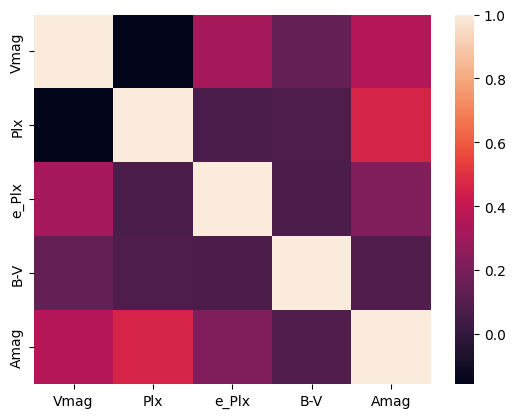

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True))

In [ ]:
data = df['TargetClass'].value_counts()

data

,count
TargetClass,
1,15793
0,4939


In [ ]:
df_origin = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler =  StandardScaler()

In [ ]:
df_scale = df[['Vmag','Plx', 'e_Plx', 'B-V', 'Amag']]

In [ ]:
df[['Vmag','Plx', 'e_Plx', 'B-V', 'Amag']] = Scaler.fit_transform(df_scale)

In [ ]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,1.496114,-0.056283,0.509140,0.133989,G5/G6V,1.168348,1
1,2.165361,-0.363143,1.082997,2.744332,M1V:,0.729024,1
2,0.603784,-0.079330,-0.120977,-0.270461,F3V,0.645687,1
3,-0.250083,1.055262,-0.301010,0.061844,G3IV,1.255019,1
4,0.588399,-0.369070,-0.143481,0.628074,G6III,-0.147845,0


In [ ]:
df.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
SpType,0
Amag,0
TargetClass,0


In [ ]:
df['SpType'].value_counts()

,count
SpType,
F5V,753
K0III,710
F3V,607
A0V,575
F6V,486
...,...
G1/G2IV/V,1
B9Iab,1
F5V:w...,1


In [ ]:
df_col = df['SpType'].value_counts()

In [ ]:
df_col[df_col>10]

,count
SpType,
F5V,753
K0III,710
F3V,607
A0V,575
F6V,486
...,...
F5III,11
F5IV-V,11
F3/F5IV/V,11


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onhot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

train_encoded = onhot_encoder.fit_transform(df[['SpType']])

In [ ]:
train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df['SpType'].nunique()

1681

In [ ]:
train_encoded_df = pd.DataFrame(train_encoded, columns = onhot_encoder.get_feature_names_out(['SpType']))

In [ ]:
train_encoded_df

,SpType_A(V) + G5III,SpType_A0/2V + A9:,SpType_A0/A1IV,SpType_A0/A1IV/V,SpType_A0/A1IVp...,SpType_A0/A1Ia,SpType_A0/A1V,SpType_A0/A1V:,SpType_A0/A1Vn,SpType_A0/A1Vn...,...,SpType_O9.5Vpe,SpType_O9III,SpType_O9IV,SpType_O9IV-V,SpType_O9Ia,SpType_O9Iab:,SpType_O9Ib,SpType_O9V,SpType_O9Vp,SpType_O9Vp...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.concat([df.drop(['SpType'], axis=1), train_encoded_df], axis=1)

In [ ]:
data

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,SpType_A(V) + G5III,SpType_A0/2V + A9:,SpType_A0/A1IV,SpType_A0/A1IV/V,...,SpType_O9.5Vpe,SpType_O9III,SpType_O9IV,SpType_O9IV-V,SpType_O9Ia,SpType_O9Iab:,SpType_O9Ib,SpType_O9V,SpType_O9Vp,SpType_O9Vp...
0,1.496114,-0.056283,0.509140,0.133989,1.168348,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.165361,-0.363143,1.082997,2.744332,0.729024,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.603784,-0.079330,-0.120977,-0.270461,0.645687,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.250083,1.055262,-0.301010,0.061844,1.255019,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588399,-0.369070,-0.143481,0.628074,-0.147845,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,-0.750096,0.402032,-0.289758,0.002816,0.524191,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20728,0.819174,-0.267661,-0.323514,-0.217992,0.333965,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20729,1.265339,-0.471795,0.452880,-0.438800,-0.393429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20730,0.011462,1.880361,-0.210994,0.378846,1.765171,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_origin = df_origin.drop(columns=['TargetClass'],axis=1)
X = data.drop(columns=['TargetClass'],axis=1)
y = data['TargetClass']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3,stratify=y, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(14512, 1686) (6220, 1686)


In [ ]:
X.isna().sum()

,0
Vmag,0
Plx,0
e_Plx,0
B-V,0
Amag,0
...,...
SpType_O9Iab:,0
SpType_O9Ib,0
SpType_O9V,0
SpType_O9Vp,0


In [ ]:
X_origin

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625
1,10.86,3.26,2.12,1.840,M1V:,18.426088
2,8.83,7.57,1.05,0.461,F3V,18.225480
3,7.72,24.80,0.89,0.613,G3IV,19.692257
4,8.81,3.17,1.03,0.872,G6III,16.315296
...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014
20728,9.11,4.71,0.87,0.485,F5V,17.475105
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129
20730,8.06,37.33,0.97,0.758,K1V,20.920290


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Шаг 1. создание модели
lr = KNeighborsClassifier()

# Шаг 2. обучение модели
lr.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1340,  142],
       [  72, 4666]])

In [ ]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9655948553054663
0.9704658901830283
0.9848037146475306
0.9775822333961869


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

#Задаем возможные параметры логистической регрессии(Только для GridSearchCV)
params = {
    'C': [100, 10, 1, 0.1],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}
#Создаем модель
model = LogisticRegression(random_state=42)
#Создаем обьект GridSearchCV
gs = GridSearchCV(
    model,
    params,
    cv=5,
    verbose=10,
    scoring='f1',
    refit=True
)
#Обучаем
gs.fit(X_train,y_train)

best_model = gs.best_estimator_

print('Лучшие параметры: ', gs.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START C=100, penalty=l2, solver=liblinear........................
[CV 1/5; 1/16] END C=100, penalty=l2, solver=liblinear;, score=0.992 total time=   0.4s
[CV 2/5; 1/16] START C=100, penalty=l2, solver=liblinear........................
[CV 2/5; 1/16] END C=100, penalty=l2, solver=liblinear;, score=0.990 total time=   0.5s
[CV 3/5; 1/16] START C=100, penalty=l2, solver=liblinear........................
[CV 3/5; 1/16] END C=100, penalty=l2, solver=liblinear;, score=0.991 total time=   0.4s
[CV 4/5; 1/16] START C=100, penalty=l2, solver=liblinear........................
[CV 4/5; 1/16] END C=100, penalty=l2, solver=liblinear;, score=0.988 total time=   0.4s
[CV 5/5; 1/16] START C=100, penalty=l2, solver=liblinear........................
[CV 5/5; 1/16] END C=100, penalty=l2, solver=liblinear;, score=0.992 total time=   0.4s
[CV 1/5; 2/16] START C=100, penalty=l2, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 2/16] END C=100, penalty=l2, solver=saga;, score=0.964 total time=  42.1s
[CV 2/5; 2/16] START C=100, penalty=l2, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 2/16] END C=100, penalty=l2, solver=saga;, score=0.965 total time=  53.5s
[CV 3/5; 2/16] START C=100, penalty=l2, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 2/16] END C=100, penalty=l2, solver=saga;, score=0.968 total time=  56.7s
[CV 4/5; 2/16] START C=100, penalty=l2, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 2/16] END C=100, penalty=l2, solver=saga;, score=0.956 total time=  49.9s
[CV 5/5; 2/16] START C=100, penalty=l2, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 2/16] END C=100, penalty=l2, solver=saga;, score=0.963 total time=  48.2s
[CV 1/5; 3/16] START C=100, penalty=l1, solver=liblinear........................
[CV 1/5; 3/16] END C=100, penalty=l1, solver=liblinear;, score=0.991 total time=   1.1s
[CV 2/5; 3/16] START C=100, penalty=l1, solver=liblinear........................
[CV 2/5; 3/16] END C=100, penalty=l1, solver=liblinear;, score=0.988 total time=   0.7s
[CV 3/5; 3/16] START C=100, penalty=l1, solver=liblinear........................
[CV 3/5; 3/16] END C=100, penalty=l1, solver=liblinear;, score=0.991 total time=   1.2s
[CV 4/5; 3/16] START C=100, penalty=l1, solver=liblinear........................
[CV 4/5; 3/16] END C=100, penalty=l1, solver=liblinear;, score=0.988 total time=   1.3s
[CV 5/5; 3/16] START C=100, penalty=l1, solver=liblinear........................
[CV 5/5; 3/16] END C=100, penalty=l1, solver=liblinear;, score=0.990 total time=   0.9s
[CV 1/5; 4/16] START C=100, penalty=l1, solver=saga.....................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 4/16] END C=100, penalty=l1, solver=saga;, score=0.964 total time= 1.4min
[CV 2/5; 4/16] START C=100, penalty=l1, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 4/16] END C=100, penalty=l1, solver=saga;, score=0.965 total time=  59.0s
[CV 3/5; 4/16] START C=100, penalty=l1, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 4/16] END C=100, penalty=l1, solver=saga;, score=0.968 total time=  58.8s
[CV 4/5; 4/16] START C=100, penalty=l1, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 4/16] END C=100, penalty=l1, solver=saga;, score=0.956 total time=  58.8s
[CV 5/5; 4/16] START C=100, penalty=l1, solver=saga.............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 4/16] END C=100, penalty=l1, solver=saga;, score=0.963 total time=  58.9s
[CV 1/5; 5/16] START C=10, penalty=l2, solver=liblinear.........................
[CV 1/5; 5/16] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   0.5s
[CV 2/5; 5/16] START C=10, penalty=l2, solver=liblinear.........................
[CV 2/5; 5/16] END C=10, penalty=l2, solver=liblinear;, score=0.989 total time=   0.4s
[CV 3/5; 5/16] START C=10, penalty=l2, solver=liblinear.........................
[CV 3/5; 5/16] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   0.4s
[CV 4/5; 5/16] START C=10, penalty=l2, solver=liblinear.........................
[CV 4/5; 5/16] END C=10, penalty=l2, solver=liblinear;, score=0.988 total time=   0.4s
[CV 5/5; 5/16] START C=10, penalty=l2, solver=liblinear.........................
[CV 5/5; 5/16] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   0.4s
[CV 1/5; 6/16] START C=10, penalty=l2, solver=saga...........................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/16] END C=10, penalty=l2, solver=saga;, score=0.964 total time=  38.6s
[CV 2/5; 6/16] START C=10, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/16] END C=10, penalty=l2, solver=saga;, score=0.965 total time=  38.5s
[CV 3/5; 6/16] START C=10, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/16] END C=10, penalty=l2, solver=saga;, score=0.968 total time=  43.1s
[CV 4/5; 6/16] START C=10, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/16] END C=10, penalty=l2, solver=saga;, score=0.956 total time=  43.6s
[CV 5/5; 6/16] START C=10, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 6/16] END C=10, penalty=l2, solver=saga;, score=0.963 total time=  38.5s
[CV 1/5; 7/16] START C=10, penalty=l1, solver=liblinear.........................
[CV 1/5; 7/16] END C=10, penalty=l1, solver=liblinear;, score=0.991 total time=   0.4s
[CV 2/5; 7/16] START C=10, penalty=l1, solver=liblinear.........................
[CV 2/5; 7/16] END C=10, penalty=l1, solver=liblinear;, score=0.988 total time=   0.4s
[CV 3/5; 7/16] START C=10, penalty=l1, solver=liblinear.........................
[CV 3/5; 7/16] END C=10, penalty=l1, solver=liblinear;, score=0.990 total time=   0.4s
[CV 4/5; 7/16] START C=10, penalty=l1, solver=liblinear.........................
[CV 4/5; 7/16] END C=10, penalty=l1, solver=liblinear;, score=0.987 total time=   0.4s
[CV 5/5; 7/16] START C=10, penalty=l1, solver=liblinear.........................
[CV 5/5; 7/16] END C=10, penalty=l1, solver=liblinear;, score=0.990 total time=   0.4s
[CV 1/5; 8/16] START C=10, penalty=l1, solver=saga............................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 8/16] END C=10, penalty=l1, solver=saga;, score=0.964 total time=  59.3s
[CV 2/5; 8/16] START C=10, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 8/16] END C=10, penalty=l1, solver=saga;, score=0.965 total time=  59.4s
[CV 3/5; 8/16] START C=10, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 8/16] END C=10, penalty=l1, solver=saga;, score=0.968 total time=  59.0s
[CV 4/5; 8/16] START C=10, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 8/16] END C=10, penalty=l1, solver=saga;, score=0.956 total time=  58.8s
[CV 5/5; 8/16] START C=10, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 8/16] END C=10, penalty=l1, solver=saga;, score=0.963 total time=  59.2s
[CV 1/5; 9/16] START C=1, penalty=l2, solver=liblinear..........................
[CV 1/5; 9/16] END C=1, penalty=l2, solver=liblinear;, score=0.986 total time=   0.4s
[CV 2/5; 9/16] START C=1, penalty=l2, solver=liblinear..........................
[CV 2/5; 9/16] END C=1, penalty=l2, solver=liblinear;, score=0.981 total time=   0.4s
[CV 3/5; 9/16] START C=1, penalty=l2, solver=liblinear..........................
[CV 3/5; 9/16] END C=1, penalty=l2, solver=liblinear;, score=0.983 total time=   0.4s
[CV 4/5; 9/16] START C=1, penalty=l2, solver=liblinear..........................
[CV 4/5; 9/16] END C=1, penalty=l2, solver=liblinear;, score=0.979 total time=   0.4s
[CV 5/5; 9/16] START C=1, penalty=l2, solver=liblinear..........................
[CV 5/5; 9/16] END C=1, penalty=l2, solver=liblinear;, score=0.983 total time=   0.4s
[CV 1/5; 10/16] START C=1, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 10/16] END C=1, penalty=l2, solver=saga;, score=0.964 total time=  38.5s
[CV 2/5; 10/16] START C=1, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 10/16] END C=1, penalty=l2, solver=saga;, score=0.965 total time=  38.5s
[CV 3/5; 10/16] START C=1, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 10/16] END C=1, penalty=l2, solver=saga;, score=0.968 total time=  38.5s
[CV 4/5; 10/16] START C=1, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 10/16] END C=1, penalty=l2, solver=saga;, score=0.956 total time=  38.5s
[CV 5/5; 10/16] START C=1, penalty=l2, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 10/16] END C=1, penalty=l2, solver=saga;, score=0.963 total time=  38.6s
[CV 1/5; 11/16] START C=1, penalty=l1, solver=liblinear.........................
[CV 1/5; 11/16] END C=1, penalty=l1, solver=liblinear;, score=0.986 total time=   0.5s
[CV 2/5; 11/16] START C=1, penalty=l1, solver=liblinear.........................
[CV 2/5; 11/16] END C=1, penalty=l1, solver=liblinear;, score=0.984 total time=   0.6s
[CV 3/5; 11/16] START C=1, penalty=l1, solver=liblinear.........................
[CV 3/5; 11/16] END C=1, penalty=l1, solver=liblinear;, score=0.983 total time=   0.5s
[CV 4/5; 11/16] START C=1, penalty=l1, solver=liblinear.........................
[CV 4/5; 11/16] END C=1, penalty=l1, solver=liblinear;, score=0.980 total time=   0.6s
[CV 5/5; 11/16] START C=1, penalty=l1, solver=liblinear.........................
[CV 5/5; 11/16] END C=1, penalty=l1, solver=liblinear;, score=0.986 total time=   0.6s
[CV 1/5; 12/16] START C=1, penalty=l1, solver=saga............................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 12/16] END C=1, penalty=l1, solver=saga;, score=0.963 total time=  52.4s
[CV 2/5; 12/16] START C=1, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 12/16] END C=1, penalty=l1, solver=saga;, score=0.964 total time=  52.3s
[CV 3/5; 12/16] START C=1, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 12/16] END C=1, penalty=l1, solver=saga;, score=0.967 total time=  52.1s
[CV 4/5; 12/16] START C=1, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 12/16] END C=1, penalty=l1, solver=saga;, score=0.955 total time=  52.0s
[CV 5/5; 12/16] START C=1, penalty=l1, solver=saga..............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 12/16] END C=1, penalty=l1, solver=saga;, score=0.961 total time=  52.0s
[CV 1/5; 13/16] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 1/5; 13/16] END C=0.1, penalty=l2, solver=liblinear;, score=0.963 total time=   0.4s
[CV 2/5; 13/16] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 2/5; 13/16] END C=0.1, penalty=l2, solver=liblinear;, score=0.964 total time=   0.5s
[CV 3/5; 13/16] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 3/5; 13/16] END C=0.1, penalty=l2, solver=liblinear;, score=0.964 total time=   0.6s
[CV 4/5; 13/16] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 4/5; 13/16] END C=0.1, penalty=l2, solver=liblinear;, score=0.956 total time=   0.5s
[CV 5/5; 13/16] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 5/5; 13/16] END C=0.1, penalty=l2, solver=liblinear;, score=0.963 total time=   0.6s
[CV 1/5; 14/16] START C=0.1, penalty=l2, solver=saga................

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 14/16] END C=0.1, penalty=l2, solver=saga;, score=0.961 total time=  38.8s
[CV 2/5; 14/16] START C=0.1, penalty=l2, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 14/16] END C=0.1, penalty=l2, solver=saga;, score=0.962 total time=  38.5s
[CV 3/5; 14/16] START C=0.1, penalty=l2, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 14/16] END C=0.1, penalty=l2, solver=saga;, score=0.963 total time=  38.6s
[CV 4/5; 14/16] START C=0.1, penalty=l2, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 14/16] END C=0.1, penalty=l2, solver=saga;, score=0.953 total time=  38.5s
[CV 5/5; 14/16] START C=0.1, penalty=l2, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 14/16] END C=0.1, penalty=l2, solver=saga;, score=0.959 total time=  38.9s
[CV 1/5; 15/16] START C=0.1, penalty=l1, solver=liblinear.......................
[CV 1/5; 15/16] END C=0.1, penalty=l1, solver=liblinear;, score=0.961 total time=   0.4s
[CV 2/5; 15/16] START C=0.1, penalty=l1, solver=liblinear.......................
[CV 2/5; 15/16] END C=0.1, penalty=l1, solver=liblinear;, score=0.960 total time=   0.4s
[CV 3/5; 15/16] START C=0.1, penalty=l1, solver=liblinear.......................
[CV 3/5; 15/16] END C=0.1, penalty=l1, solver=liblinear;, score=0.959 total time=   0.4s
[CV 4/5; 15/16] START C=0.1, penalty=l1, solver=liblinear.......................
[CV 4/5; 15/16] END C=0.1, penalty=l1, solver=liblinear;, score=0.953 total time=   0.4s
[CV 5/5; 15/16] START C=0.1, penalty=l1, solver=liblinear.......................
[CV 5/5; 15/16] END C=0.1, penalty=l1, solver=liblinear;, score=0.959 total time=   0.4s
[CV 1/5; 16/16] START C=0.1, penalty=l1, solver=saga..............

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 16/16] END C=0.1, penalty=l1, solver=saga;, score=0.957 total time=  48.2s
[CV 2/5; 16/16] START C=0.1, penalty=l1, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 16/16] END C=0.1, penalty=l1, solver=saga;, score=0.956 total time=  48.3s
[CV 3/5; 16/16] START C=0.1, penalty=l1, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 16/16] END C=0.1, penalty=l1, solver=saga;, score=0.958 total time=  48.2s
[CV 4/5; 16/16] START C=0.1, penalty=l1, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 16/16] END C=0.1, penalty=l1, solver=saga;, score=0.948 total time=  48.1s
[CV 5/5; 16/16] START C=0.1, penalty=l1, solver=saga............................


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 16/16] END C=0.1, penalty=l1, solver=saga;, score=0.955 total time=  56.7s
Лучшие параметры:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Лучшие параметры Logregr:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
best_score_lr = gs.best_score_
best_score_lr

0.9905937756958856

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
params = {
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Создаем модель
model_tree = DecisionTreeClassifier(random_state=42)
#Создаем обьект GridSearchCV
gs_tree = GridSearchCV(
    model_tree,
    params,
    cv=5,
    verbose=10,
    scoring='f1',
    refit=True
)
#Обучаем
gs_tree.fit(X_train,y_train)

best_model_tree = gs_tree.best_estimator_
best_score_tree = gs_tree.best_score_

print('Лучшие параметры: ', gs_tree.best_params_)
print('Лучший скор: ', gs_tree.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START max_depth=3, min_samples_leaf=1, min_samples_split=2.......
[CV 1/5; 1/45] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.945 total time=   0.5s
[CV 2/5; 1/45] START max_depth=3, min_samples_leaf=1, min_samples_split=2.......
[CV 2/5; 1/45] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.944 total time=   0.4s
[CV 3/5; 1/45] START max_depth=3, min_samples_leaf=1, min_samples_split=2.......
[CV 3/5; 1/45] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.943 total time=   0.4s
[CV 4/5; 1/45] START max_depth=3, min_samples_leaf=1, min_samples_split=2.......
[CV 4/5; 1/45] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.937 total time=   0.4s
[CV 5/5; 1/45] START max_depth=3, min_samples_leaf=1, min_samples_split=2.......
[CV 5/5; 1/45] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.940 total time=   0.8s
[CV 1/5;

Лучшие параметры:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Создаем модель
model_forest = RandomForestClassifier(random_state=42)
#Создаем обьект GridSearchCV
gs_forest = GridSearchCV(
    model_forest,
    params,
    cv=5,
    verbose=10,
    scoring='f1',
    refit=True
)
#Обучаем
gs_forest.fit(X_train,y_train)

best_model_forest = gs_forest.best_estimator_
best_score_forest = gs_forest.best_score_

print('Лучшие параметры: ', gs_forest.best_params_)
print('Лучший скор: ', gs_forest.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5; 1/135] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/135] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.6s
[CV 2/5; 1/135] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/135] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.6s
[CV 3/5; 1/135] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/135] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.6s
[CV 4/5; 1/135] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/135] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.6s
[CV 5/5; 1/135] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n

Лучшие параметры:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
import catboost

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values,
                                                       test_size=0.3,
                                                       random_state=42)

In [ ]:
X_origin

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625
1,10.86,3.26,2.12,1.840,M1V:,18.426088
2,8.83,7.57,1.05,0.461,F3V,18.225480
3,7.72,24.80,0.89,0.613,G3IV,19.692257
4,8.81,3.17,1.03,0.872,G6III,16.315296
...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014
20728,9.11,4.71,0.87,0.485,F5V,17.475105
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129
20730,8.06,37.33,0.97,0.758,K1V,20.920290


In [ ]:
#Задаем возможные параметры CatBoost
n_estimators = [50, 100, 200, 300]
learning_rates = [0.01, 0.05, 0.1, 0.2]

best_f1 = 0
best_params = {}

for n_estimators in n_estimators:
  for learning_rate in learning_rates:

    model = catboost.CatBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            verbose=10,
            cat_features = [4]
        )

    model.fit(X_train_origin, y_train)

    y_pred_proba = model.predict(X_test_origin)

    f1 = f1_score(y_test, y_pred_proba)

    if f1 > best_f1:
        best_f1 = f1
        best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(f"Лучшие параметры: {best_params}")
print(f"Лучший f1_score: {best_f1:.4f}")

0:	learn: 0.6904541	total: 6.05ms	remaining: 297ms
10:	learn: 0.6662658	total: 62.6ms	remaining: 222ms
20:	learn: 0.6463014	total: 119ms	remaining: 164ms
30:	learn: 0.6297444	total: 173ms	remaining: 106ms
40:	learn: 0.6160045	total: 231ms	remaining: 50.8ms
49:	learn: 0.6056442	total: 282ms	remaining: 0us
0:	learn: 0.6799487	total: 6.1ms	remaining: 299ms
10:	learn: 0.5996249	total: 65.8ms	remaining: 233ms
20:	learn: 0.5680049	total: 121ms	remaining: 168ms
30:	learn: 0.5553451	total: 177ms	remaining: 109ms
40:	learn: 0.5500641	total: 234ms	remaining: 51.4ms
49:	learn: 0.5478044	total: 287ms	remaining: 0us
0:	learn: 0.6674172	total: 5.94ms	remaining: 291ms
10:	learn: 0.5653064	total: 61.4ms	remaining: 218ms
20:	learn: 0.5492844	total: 136ms	remaining: 188ms
30:	learn: 0.5460495	total: 193ms	remaining: 118ms
40:	learn: 0.5444382	total: 254ms	remaining: 55.7ms
49:	learn: 0.5432236	total: 306ms	remaining: 0us
0:	learn: 0.6443487	total: 6.12ms	remaining: 300ms
10:	learn: 0.5487245	total: 62.4

Лучшие параметры: {'n_estimators': 100, 'learning_rate': 0.2}

Нейросеть

In [ ]:
import torch

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(1686, 128)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(128, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

In [ ]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train_tensor, y_train_tensor)), batch_size=64, shuffle=True)

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

In [ ]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

In [ ]:
y_train_tensor = y_train_tensor.unsqueeze(1)

In [ ]:
model = train_stochastic(model, train_loader, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

curr_loss 0.5858467531099193
curr_loss 0.5165931401273752
curr_loss 0.4916249559576816
curr_loss 0.4644962991649359
curr_loss 0.43205587047312227
curr_loss 0.3949814691548831
curr_loss 0.35581034198731576
curr_loss 0.31852625192262
curr_loss 0.28556847408216957
curr_loss 0.25823167563797617
curr_loss 0.23659326195191707
curr_loss 0.2193543888004866
curr_loss 0.20596739603821926
curr_loss 0.1953688099126984
curr_loss 0.18679115415801037
curr_loss 0.17954060474681435
curr_loss 0.1734873426150908
curr_loss 0.16776523638992583
curr_loss 0.16245475788867422
curr_loss 0.15738582939303394
curr_loss 0.15249734988953048
curr_loss 0.14773688309452607
curr_loss 0.14272794944730624
curr_loss 0.1379159838945855
curr_loss 0.13306294452185674
curr_loss 0.12824121877419792
curr_loss 0.12343401204187439
curr_loss 0.11854098545231483
curr_loss 0.11384673026033434
curr_loss 0.10917466685241539
curr_loss 0.10460249753053492
curr_loss 0.10014756736119938
curr_loss 0.09577945202982899
curr_loss 0.0915256258

In [ ]:
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [ ]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test_tensor))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [ ]:
print(f1_score(y_test, nn_prediction))

0.9923214473545808


In [ ]:
test = pd.read_csv('test_star.csv')

In [ ]:
test_scale = test[['Vmag','Plx', 'e_Plx', 'B-V', 'Amag']]
test[['Vmag','Plx', 'e_Plx', 'B-V', 'Amag']] = Scaler.transform(test_scale)

In [ ]:
test.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,-0.103926,-0.160984,-0.165985,0.564674,G5III,0.102124
1,-0.534706,-0.492209,-0.706085,1.572520,K1/K2III,-1.558443
2,-0.996256,-0.050356,-0.357271,0.949448,K1III,-0.167425
3,-2.750145,-0.114889,-0.492296,1.526609,K4III,-1.232312
4,-0.550091,-0.416482,-0.019708,2.219640,K5III,-0.995084


In [ ]:
test_encoded = onhot_encoder.transform(test[['SpType']])

In [ ]:
test_encoded_df = pd.DataFrame(test_encoded, columns = onhot_encoder.get_feature_names_out(['SpType']))

In [ ]:
test_data = pd.concat([test.drop(['SpType'], axis=1), test_encoded_df], axis=1)

In [ ]:
test_data

,Vmag,Plx,e_Plx,B-V,Amag,SpType_A(V) + G5III,SpType_A0/2V + A9:,SpType_A0/A1IV,SpType_A0/A1IV/V,SpType_A0/A1IVp...,...,SpType_O9.5Vpe,SpType_O9III,SpType_O9IV,SpType_O9IV-V,SpType_O9Ia,SpType_O9Iab:,SpType_O9Ib,SpType_O9V,SpType_O9Vp,SpType_O9Vp...
0,-0.103926,-0.160984,-0.165985,0.564674,0.102124,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.534706,-0.492209,-0.706085,1.572520,-1.558443,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.996256,-0.050356,-0.357271,0.949448,-0.167425,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.750145,-0.114889,-0.492296,1.526609,-1.232312,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.550091,-0.416482,-0.019708,2.219640,-0.995084,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18815,-0.250083,-0.419116,-0.120977,1.972598,-0.847918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18816,0.173004,-0.447431,-0.391027,0.918841,-0.796721,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18817,0.373009,-0.502745,-0.301010,-1.481625,-1.186720,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18818,0.803789,-0.155716,-0.064716,-0.228923,0.603651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'SpType_A(V) + G5III',
       'SpType_A0/2V + A9:', 'SpType_A0/A1IV', 'SpType_A0/A1IV/V',
       'SpType_A0/A1IVp...',
       ...
       'SpType_O9.5Vpe', 'SpType_O9III', 'SpType_O9IV', 'SpType_O9IV-V',
       'SpType_O9Ia', 'SpType_O9Iab:', 'SpType_O9Ib', 'SpType_O9V',
       'SpType_O9Vp', 'SpType_O9Vp...'],
      dtype='object', length=1686)

In [ ]:
X.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'SpType_A(V) + G5III',
       'SpType_A0/2V + A9:', 'SpType_A0/A1IV', 'SpType_A0/A1IV/V',
       'SpType_A0/A1IVp...',
       ...
       'SpType_O9.5Vpe', 'SpType_O9III', 'SpType_O9IV', 'SpType_O9IV-V',
       'SpType_O9Ia', 'SpType_O9Iab:', 'SpType_O9Ib', 'SpType_O9V',
       'SpType_O9Vp', 'SpType_O9Vp...'],
      dtype='object', length=1686)

In [ ]:
y_pred_log = best_model.predict(test_data)

In [ ]:
y_pred_tree = best_model_tree.predict(test_data)

In [ ]:
y_pred_forest = best_model_forest.predict(test_data)

In [ ]:
y_pred_cat = model.predict_proba(test)

In [ ]:
test_data = torch.from_numpy(test_data.values).float()

In [ ]:
with torch.no_grad():
    y_pred_NN = model(torch.FloatTensor(test_data))
    y_pred_NN = y_pred_NN.tolist()

y_pred_NN = np.array([int(x[0] > 0.5) for x in y_pred_NN])

In [ ]:
submission = pd.read_csv('sample_submition_stars.csv', index_col='index')
submission

,TargetClass
index,
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0


In [ ]:
submission['TargetClass'] = y_pred_NN

In [ ]:
submission.to_csv("/content/NN_submission.csv")

In [ ]:
submission.value_counts()

,count
TargetClass,
0,14332
1,4488


In [ ]:
submission['TargetClass'] = submission['TargetClass'].apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
submission

,TargetClass
index,
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0


Улучшение модели